### COM361 &mdash; Introdução a Otimização &mdash; 2022, Prof. Amit ###

# 2. Estratégia de controle ótimo para diminuir espalhamento de fake news em mídia social [Capítulo 15 de ref. 1]						 #

#### Julia Vaisburd Xexéo  (julia.xexeo@poli.ufrj.br), Aluno2 (email)

*****

### Índice

1. [Introdução](#1.-Introdução)
1. [Modelo Matemático] (#2.-Modelo Mathemático)
1. [Solução](#3.-Solução)
1. [Resultados e Discussão](#4.-Resultados-e-discussão)
  1. [Subseção Opcional](#4.A.-Acrescente-subseções-se-necessário)
1. [Conclusão](#5.-Conclusão)

## 1. Introdução ##

começar com a salt epidemic china

Nos últimos anos, com o advento das redes sociais e sua disseminação, o espalhamento de fake news, notícias falsas, aumentou e foi potencializado pela rapidez desses novos meios de comunicação. Eventos como as eleições americanas em 2016, Brasileiras em 2018 e a epidemia de Covid 19, foram marcados pelo alto número de noticias falsas disseminadas nos meios de comunicação.

O nosso projeto tem como objetivo buscar o controle ótimo e preditivo de um modelo de espalhamento de fake news nas redes sociais, proposto no livro 

O modelo que iremos utilizar é uma combinação do   modelo ISR para dissemiçaõ de informações nas redes sociais, que considera a existencia de Ignornorantes (I), Spreadersm, recovered, com um modelo de controle otimo. 

A partir da perspectiva de controle sera definida a função objetiva e a estratégia de controle ótimo


No cenário que estamos considerando as noticias falsas são disseminadas não apenas em canais duvidosos, mas também em canais de noticias confiaveis da internet. Além disso, o governo está ciente que isso é uma possível ameaça e irá tomar medidas para conveerter e previnir essa epidemia de falsas informações, antes que vire um panic



. The fake news of this type is traditionally fast
spreading and the damage from it will be done in short order if the information
is not quelled. Obviously, this potential information epidemic has already been
spreading around the population before the government became aware of its
growing popularity.


Por sorte, o governo tem acesso a modernas ferramentas de alerta e canais de distribuição direta de noticias, e é importante ressaltar que não importa para o governo se a noticia é realmente falsa ou verdadeira, apenas se ele quer diminuir ou aumentar o espalhamento da mesma. 

A partir desse cenário, será buscado o controle optimo e preditivo e proposto uma formulação de problema.


Luckily, the government has access to modern emergency alert information
and official and direct news distribution over the internet. “Tweets”, live
YouTube press conferences, and cell phone alerts are all options of quick
communication to help stifle the false news. Note that in many ways, it does
not matter if the news is real or fake or if the government wishes to spread
or diminish the news. The core formulation and strategy of control here are
analogous.

O nosso cenário considera que as fake news estão sendo espalhadas em canais confiaveis e não confiaveis.

palavras chaves: 
epidemia de informações
estrategias para diminuir


As primeiras frases devem dar um panorama geral do projeto. Em seguida, uma descrição mais detalhada do problema que será resolvido, uma breve história do surgimento do problema (com [citations](https://en.wikipedia.org/wiki/Citation)) que será abordado, porque é importante e interessante e quaisquer outros fatos correlatos que queira expor. A fonte dos dados utilizados deve ser explicitada (pesquisa? internet? gerados sinteticamente?). Também deve ser feito um esboço do restante do relatório.


Esta seção deve ter entre 300 e 600 palavras, e **deve ser acessível a leigos** (não deve ser suposto que o leitor desta seção cursou esta disciplina (COM361)). Podem incluir figuras se acharem convenientes:

![fixit flowchart][flow]

Para mais ajuda no uso de Markdown, veja [este link](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

[flow]: https://s-media-cache-ak0.pinimg.com/736x/f5/75/c5/f575c53b93724808c6f0211890a54900.jpg

## 2. Modelo matemático ##


O objetivo da nossa modelagem é previnir de melhor forma o espalhamento de fake news nas redes sociais, levaremos em consideração o conceito de Herd Immunity, no qual 




Esta seção deve conter uma discussão das hipóteses de modelagem feitas no problema (conforme a origem do problema: física? economia? redes sociais? ...). Explique a escolha das variáveis de decisão, as restrições e a função objetivo. Finalmente, mostre o problema de otimização escrite em forma padrão. Discute o tipo de modelo adotado (LP, QP, MIP, etc.). Equações devem ser formatadas em $\LaTeX$ dentro do notebook Julia. Nesta seção, pode supor que **o leitor está familiarizado com a matéria"**.

Eis um exemplo de uma equação:

$$
\begin{bmatrix}
  1 & 2 \\
  3 & 4
\end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} =
\begin{bmatrix} 5 \\ 6 \end{bmatrix}
$$

Aqui está um exemplo de um problema de otimização no formato padrão:

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{maximize}}\qquad& f_0(x) \\
\text{sujeito a:}\qquad& f_i(x) \le 0 && i=1,\dots,m\\
& h_j(x) = 0 && j=1,\dots,r
\end{aligned}
$$

Para algumas dicas rápidas sobre a utilizção de $\LaTeX$, veja [este cheat sheet](http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf).

## 3. Solução ##

Nesta seção, coloque seu código em Julia + JuMP e resolva o problema proposto. Seu código deve ser limpo (não macarrônico!), de fácil leitura, bem comentado e anotado e deve compilar sem erros em Julia 1.x, x$\geq 1$! Não valem códigos em outras linguagens. **Vou rodar seu código para avaliar seu projeto**. Sugiro a utilização de múltiplos blocos de códigos separados por blocos de texto (células Markdown) explicando as várias partes da sua solução. Sugiro também a resolução de várias versões do seu problema, com modelos e hipóteses diferentes.

É permitido chamar pacotes externos, mas evite a utilização de bibliotecas exóticas (pois, em geral, não rodam em todas as versões de Julia, e terei que instalar a mesma versão que você usou, ou rodar na plataforma Google Colab, que gostaria de evitar).

In [3]:
@time using Clp
@time using JuMP
@time using Plots
@time using Ipopt
@time using LinearAlgebra
@time using ImplicitEquations
@time using Mosek
@time using  MosekTools

  0.000630 seconds (327 allocations: 23.641 KiB)
  0.001435 seconds (277 allocations: 18.609 KiB)
  0.000940 seconds (277 allocations: 18.609 KiB)
  0.012398 seconds (33.14 k allocations: 1.731 MiB)
  0.000553 seconds (278 allocations: 18.656 KiB)
  0.140461 seconds (246.71 k allocations: 14.548 MiB, 12.64% compilation time)
  0.026476 seconds (68.72 k allocations: 5.399 MiB, 27.64% compilation time)
  0.008233 seconds (11.68 k allocations: 712.133 KiB)


In [17]:
b = 1 #colocar assim?
beta = 0.3
gama = 1
k = 50

T = [ i for i=1:k ]

#m = Model(with_optimizer(Clp.Optimizer))
m = Model(with_optimizer(Ipopt.Optimizer))
#variaveis
@variable(m, x_1[1:T[k]])  
@variable(m, x_2[1:T[k]])  
@variable(m, u[1:T[k]])


#restrições
for k in 1:T[k] 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - beta * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + beta * x_1[k] * x_2[k] - gama * x_2[k] * x_2[k])
    @constraint(m, x_1[k] + x_2[k] <= (beta / gama)) 
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (beta/ gama)).^2)) #descobrir se aqui coloca sum

optimize!(m)

#print(m)
println("x1 ignorantes:",JuMP.value.(x_1))
println("x_2 spreaders",JuMP.value.(x_2))
println("u",JuMP.value.(u))

# plot the lines.
#plot( ,x_1, color="r")
#plot(1:50 ,x_2, color="g")
#plot(1:50 ,u, color="b")
x_1 = JuMP.value.(x_1)
x_2 = JuMP.value.(x_2)
xu = JuMP.value.(u)
plot(1:50, hcat(x_1, x_2, u), seriestype=:scatter, label=["x_1" "x_2" "u"])

LoadError: syntax: invalid identifier name "."

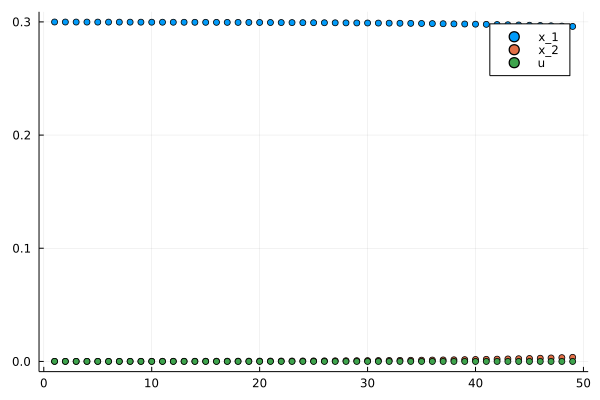

In [42]:
x1 = [0.2999141736135285, 0.2998839727431777, 0.29986151248453874, 0.2998418076735542, 0.29982339833334265, 0.299805604425222, 0.2997880263910539, 0.2997703911743022, 0.29975249034119666, 0.2997341506804318, 0.2997152184521721, 0.29969555011053134, 0.29967500637721856, 0.2996534481653639, 0.2996307335729092, 0.29960671551252605, 0.2995812397242455, 0.2995541430145712, 0.2995252516214437, 0.29949437963732345, 0.2994613274427477, 0.2994258801153148, 0.29938780578711305, 0.2993468539288705, 0.29930275354257435, 0.29925521124663734, 0.29920390923927287, 0.2991485031268442, 0.29908861960477356, 0.2990238539792408, 0.29895376751850194, 0.298877884623264, 0.2987956898062656, 0.2987066244720843, 0.29861008348929396, 0.29850541154850735, 0.2983918993016256, 0.2982687792798699, 0.29813522159098316, 0.2979903293994539, 0.2978331341978511, 0.29766259088248515, 0.29747757265274904, 0.2972768657607928, 0.29705916414677297, 0.29682306400494995, 0.2965670583375035, 0.29628953156624627, 0.29598875428761495]
x2 = [6.113269608696904e-5, 6.662932760615503e-5, 7.261920855776308e-5, 7.914664695937631e-5, 8.625982517320731e-5, 9.401119895494946e-5, 0.00010245788658209672, 0.00011166208376250423, 0.00012169151190986228, 0.0001326199039254066, 0.00014452753100179425, 0.00015750177392545407, 0.00017163774248111835, 0.0001870389467495071, 0.00020381802430133433, 0.00022209752751344104, 0.00024201077545781536, 0.0002637027750352297, 0.00028733121623595253, 0.00031306754660348203, 0.000341098130145241, 0.0003716254960667799, 0.0004048696827913605, 0.000441069682750577, 0.0004804849933768303, 0.0005233972795747086, 0.000570112152671565, 0.0006209610704194526, 0.0006763033620077935, 0.0007365283812098916, 0.000802057789681567, 0.0008733479710048058, 0.0009508925742637504, 0.0010352251836867176, 0.0011269221081095103, 0.0012266052806261675, 0.0013349452546981698, 0.001452664278087568, 0.001580539420150659, 0.001719405721156882, 0.00187015932425806, 0.002033760541400432, 0.002211236793724622, 0.002403685354726288, 0.0026122758105627587, 0.0028382521363311047, 0.003082934269901836, 0.003347719046028328, 0.0036340803331151006]
u = [8.235856243801336e-5, 5.490769123726006e-5, 4.3927269138871266e-5, 3.765284174132455e-5, 3.347000924295158e-5, 3.0428072873471062e-5, 2.808824760068019e-5, 2.621651487263651e-5, 2.4675218959809865e-5, 2.337742152082497e-5, 2.2265165661088584e-5, 2.129813564020448e-5, 2.0447306345019318e-5, 1.9691180030698992e-5, 1.9013450530655577e-5, 1.840149632873608e-5, 1.7845375979058626e-5, 1.733713929322426e-5, 1.687034335556815e-5, 1.6439705096700786e-5, 1.6040847133074943e-5, 1.5670108683091394e-5, 1.532440276762798e-5, 1.5001106901266968e-5, 1.4697978397868962e-5, 1.4413088025754645e-5, 1.414476752168613e-5, 1.3891567698426659e-5, 1.3652224740623129e-5, 1.342563289576755e-5, 1.3210822208169556e-5, 1.3006940265605177e-5, 1.281323716532281e-5, 1.2629053082191417e-5, 1.2453807953463923e-5, 1.228699289345348e-5, 1.212816302555675e-5, 1.1976931474343887e-5, 1.1832964301097836e-5, 1.1695976195396522e-5, 1.1565726755621422e-5, 1.1442017204941514e-5, 1.13246873988177e-5, 1.121361298828137e-5, 1.11087026133039e-5, 1.1009895013358632e-5, 1.0917155935396359e-5, 1.0830474431505083e-5, 1.0749855920198038e-5]

plot(1:49, hcat(x1, x2, u), seriestype=:scatter, label=["x_1" "x_2" "u"])





**Tenha certeza de que seu código compila corretamente! Rodarei seu código!**

## 4. Resultados e discussão ##

Neste seção, os resultados obtidos serão exibidos e discutidos. Mostre figuras, gráficos, imagens, curvas de compromisso, e o que mais puder melhor ilustrar seus resultados. A discussão deverá explicar o que significam os resultados e como interpretá-los. As limitações da sua abordagem/modelo também devem ser colocadas, bem como uma análise da sensibilidade dos resultados em relação às hipóteses feitas.


Utilize plots (veja exemplos  `PyPlot` [aqui](https://gist.github.com/gizmaa/7214002))

Aqui está um exemplo de uma tabela (em Markdown):

| Tabelas        | São           | Boas  |
| ------------- |:-------------:| -----:|
| col 3 é      | alinhado à direita |\$1600 |
| col 2 é      | centrado      |  \$12 |
| texto | também serve      |   \$1 |

### 4.A. Subseções devem ser utilizadas para organizar seu texto.

#### 4.A.a. ou até subsubseções.

## 5. Conclusão ##

Faça um resumo do que encontrou e dos seus resultados, e fale de pelo menos uma direção na qual  seu trabalho pode ser desenvolvido no futuro, algo que poderia ser interessante em decorrência do seu projeto.
